# Statistics

There are some inbuilt statistical modules in pyrcmip. These can help when converting assessed ranges into statistical distributions.

In [1]:
import pandas as pd
import pyrcmip.stats
import seaborn as sns

## Skewed normal

The key distribution we use is the skewed normal distribution, as introduced by [Meinshausen et al., 2009](https://doi.org/10.1038/nature08017). They introduce a skewed normal, described as: "Here, a random variable $X$ is called ‘skewed normal’, if $\log(X-c)$ has a Gaussian distribution with mean $\mu$ and variance $\sigma^2$. This allows a continuous approximation between a Gaussian distribution of $X$ and skewed log-normal distributions – by making an appropriate choice for $c$." 

In pyrcmip, we implemente such a distribution but simplify the interface by allowing the user to specify the median and range with appropriate confidence (e.g. 5-95% very likely range), leaving the software to derive a distribution (and constants) that match.

We start with a very simple, one-dimensional, example.

In [2]:
configuration_1 = pd.DataFrame(
    [
        {"median": 3, "lower": 2, "upper": 5, "conf": 0.90},
    ],
    index=["ECS"],
).T
configuration_1

ECS
median  3.0
lower   2.0
upper   5.0
conf    0.9

In [3]:
example_1 = pyrcmip.stats.sample_multivariate_skewed_normal(configuration_1, size=10 ** 6)
example_1

ECS
0       2.634094
1       3.079430
2       2.724180
3       2.626380
4       2.716885
...          ...
999995  2.548507
999996  2.066261
999997  2.109587
999998  3.677319
999999  4.572931

[1000000 rows x 1 columns]

We can confirm that the desired quantiles are close to what we wanted and plot the outputs.

ECS
5%   2.0
50%  3.0
95%  5.0

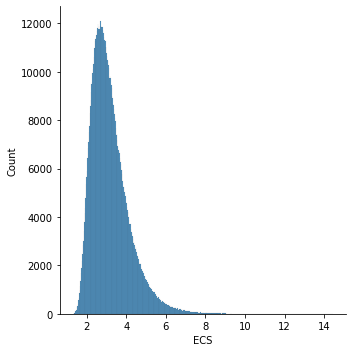

In [4]:
display(example_1.describe(percentiles=[0.05, 0.5, 0.95]).loc[["5%", "50%", "95%"], :].round(2))
sns.displot(data=example_1, x="ECS")

We can then move to two-dimensions.

In [5]:
configuration_2 = pd.DataFrame(
    [
        {"median": 3, "lower": 2, "upper": 5, "conf": 0.90},
        {"median": 1.8, "lower": 1, "upper": 2.5, "conf": 0.90},
    ],
    index=["ECS", "TCR"],
).T
configuration_2

ECS  TCR
median  3.0  1.8
lower   2.0  1.0
upper   5.0  2.5
conf    0.9  0.9

In [6]:
example_2 = pyrcmip.stats.sample_multivariate_skewed_normal(configuration_2, size=10 ** 6)
example_2

ECS       TCR
0       2.059985  1.575694
1       3.041870  1.975102
2       1.822233  2.118392
3       3.488075  2.080349
4       2.448507  1.922586
...          ...       ...
999995  3.572775  2.927260
999996  2.461633  1.859865
999997  3.433236  2.445926
999998  3.299793  2.047288
999999  2.559660  2.151599

[1000000 rows x 2 columns]

Again, we can confirm that the quantiles are as expected.

In [7]:
display(example_2.describe(percentiles=[0.05, 0.5, 0.95]).loc[["5%", "50%", "95%"], :].round(2))

ECS  TCR
5%   2.0  1.0
50%  3.0  1.8
95%  5.0  2.5

We can also make a joint plot of the data. By default, the variables have no correlation.

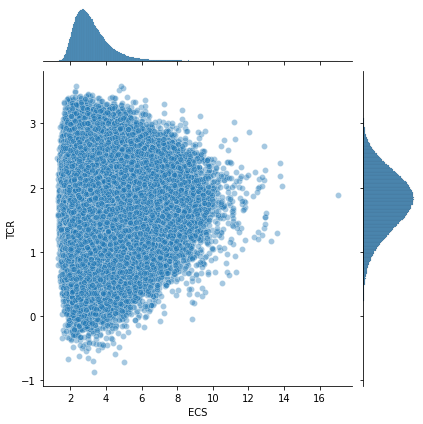

In [8]:
sns.jointplot(data=example_2, x="ECS", y="TCR", alpha=0.4)

It is possible to add correlation between the variables. This will not affect the marginal distributions, but does change the joint distribution. For ECS and TCR, this produces a more realistic joint distribution. 

In [9]:
example_3 = pyrcmip.stats.sample_multivariate_skewed_normal(configuration_2, size=10 ** 6, cor=[[1, 0.6], [0.6, 1]])
example_3

ECS       TCR
0       3.435153  2.159077
1       2.682654  1.522727
2       6.023536  1.545315
3       2.744174  1.628142
4       3.333128  1.852379
...          ...       ...
999995  2.991533  1.521591
999996  4.074950  2.281897
999997  3.911356  2.066822
999998  2.711102  2.144154
999999  3.332428  2.301828

[1000000 rows x 2 columns]

ECS  TCR
5%   2.0  1.0
50%  3.0  1.8
95%  5.0  2.5

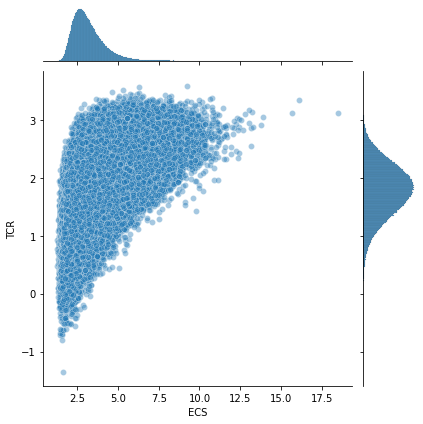

In [10]:
display(example_3.describe(percentiles=[0.05, 0.5, 0.95]).loc[["5%", "50%", "95%"], :].round(2))
sns.jointplot(data=example_3, x="ECS", y="TCR", alpha=0.4)